####  Basic plotting with matplotlib using the cleaned tweets

In [1]:
#start with all of the imports
import pandas as pd
import glob
import json
import numpy as np
import pandas as pd
import csv
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#get the data from the spreadsheet and set the index on the Team column
df=pd.read_csv("reshaped_grouped_2.csv",index_col=0)
df.head()

,Most_Negative,Moderate_Negative,Neutral,Moderate_Positive,Most_Positive,Total_Tweets,Total_Negative,Total_Positive,Pct_Strong_Negative,Pct_Strong_Positive,Pct_Any_Negative,Pct_Any_Positive,Win_PCT,Anchor
teams,,,,,,,,,,,,,,
tigers,8,13,16,50,94,181,21,144,4.42,51.93,11.60,79.56,292,10
marlins,36,64,66,53,54,273,100,107,13.19,19.78,36.63,39.19,352,20
royals,6,10,47,63,66,192,16,129,3.13,34.38,8.33,67.19,364,30
bluejays,6,32,46,230,346,660,38,576,0.91,52.42,5.76,87.27,414,40
mariners,6,44,76,201,250,577,50,451,1.04,43.33,8.67,78.16,420,50


In [3]:
chart_df =df[['Most_Negative','Moderate_Negative','Neutral','Moderate_Positive','Most_Positive']]
chart_df.head()

,Most_Negative,Moderate_Negative,Neutral,Moderate_Positive,Most_Positive
teams,,,,,
tigers,8,13,16,50,94
marlins,36,64,66,53,54
royals,6,10,47,63,66
bluejays,6,32,46,230,346
mariners,6,44,76,201,250


Text(0, 0.5, 'Tweet Count')

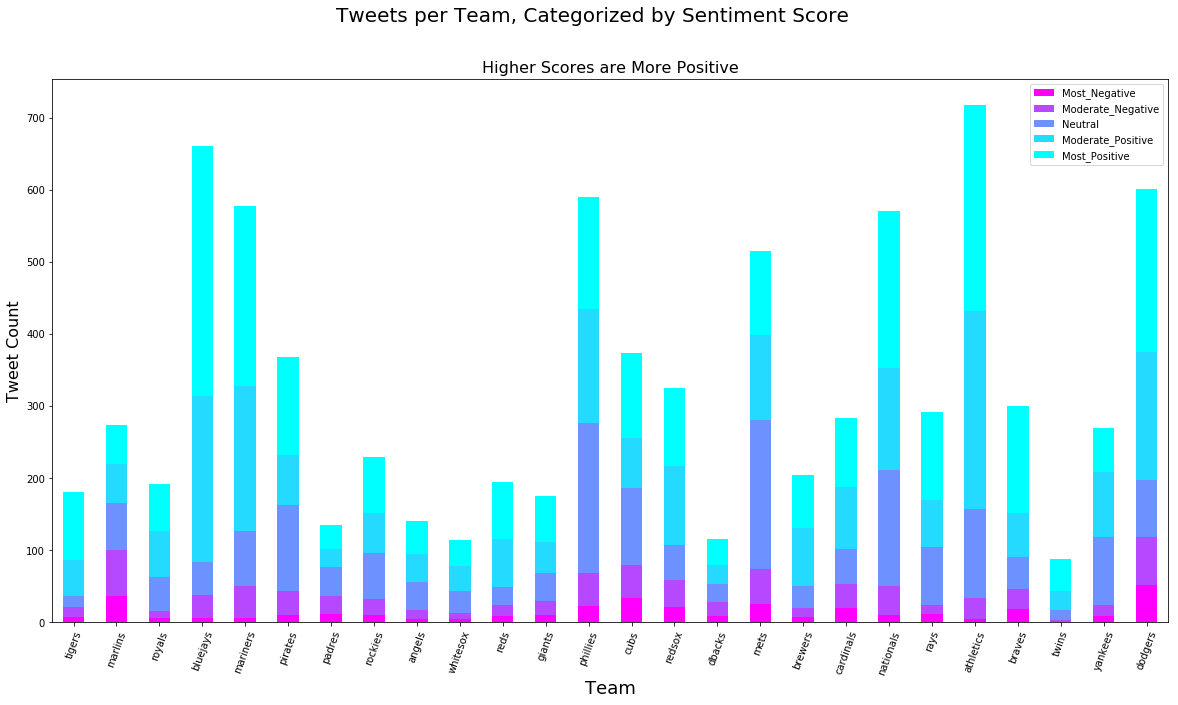

In [4]:

colors = plt.cm.cool_r(np.linspace(0, 2, 8))
chart_df.plot(kind='bar', stacked=True, figsize=(20, 10), color=colors)
plt.xticks(rotation=70)
plt.suptitle('Tweets per Team, Categorized by Sentiment Score', fontsize=20)

plt.xlabel('Team', fontsize=18)
plt.ylabel('Tweet Count', fontsize=16)

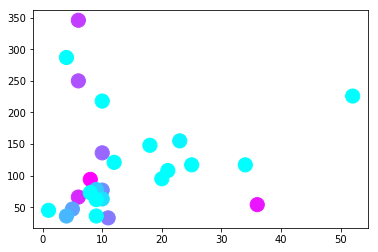

In [5]:
colors = plt.cm.cool_r(np.linspace(0, 2, 26))


plt.scatter(chart_df.Most_Negative, chart_df.Most_Positive, s=200, c=colors)

In [6]:
#next we need to make a new DF so we can add an index and move the existing index to a column
df2=chart_df.reset_index()
df2.head()

,teams,Most_Negative,Moderate_Negative,Neutral,Moderate_Positive,Most_Positive
0,tigers,8,13,16,50,94
1,marlins,36,64,66,53,54
2,royals,6,10,47,63,66
3,bluejays,6,32,46,230,346
4,mariners,6,44,76,201,250


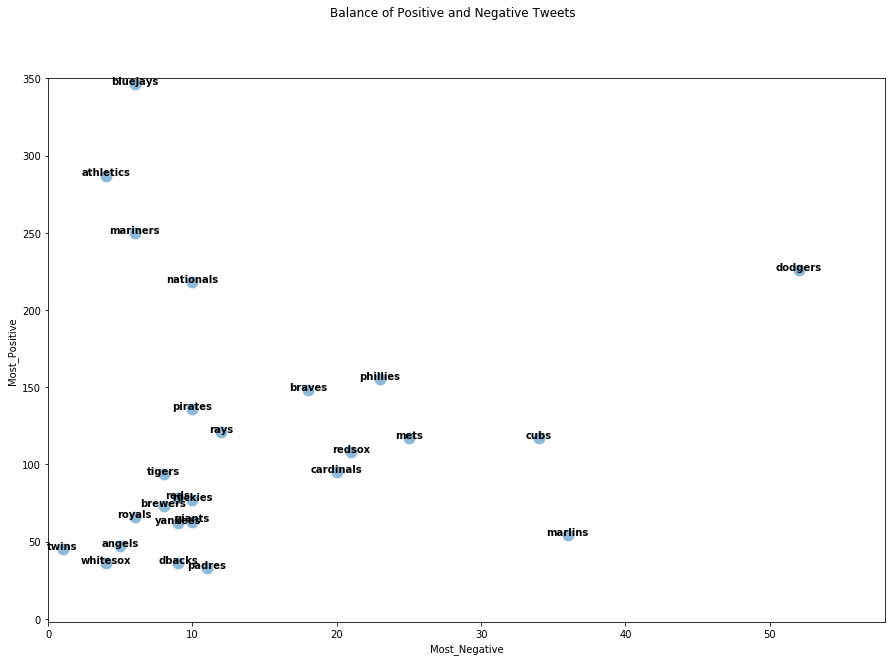

In [7]:
import seaborn as sns

#Create figure
plt.figure(figsize = (15,10))
plt.suptitle("Balance of Positive and Negative Tweets", fontsize=12)
# Create scatterplot. alpha controls the opacity and s controls the size.
ax = sns.scatterplot(df2.Most_Negative, df2.Most_Positive, alpha = 0.5,s=150)

ax.set_xlim(0,58)
ax.set_ylim(-2, 350)

#For each point, we add a text inside the bubble
for line in range(0,df.shape[0]):
     ax.text(df2.Most_Negative[line], df2.Most_Positive[line], df2.teams[line], horizontalalignment='center', size='medium', color='black', weight='semibold')

In [8]:
chart_df2 =df[['Pct_Any_Negative','Pct_Any_Positive','Win_PCT']]
chart_df2=chart_df2.reset_index()
chart_df2.head()


,teams,Pct_Any_Negative,Pct_Any_Positive,Win_PCT
0,tigers,11.60,79.56,292
1,marlins,36.63,39.19,352
2,royals,8.33,67.19,364
3,bluejays,5.76,87.27,414
4,mariners,8.67,78.16,420


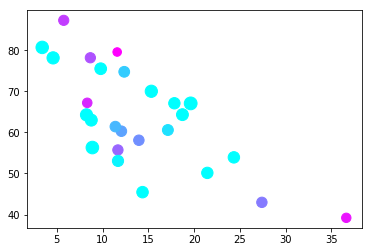

In [9]:
colors = plt.cm.cool_r(np.linspace(0, 2, 26))
sizes=chart_df2.Win_PCT

plt.scatter(chart_df2.Pct_Any_Negative, chart_df2.Pct_Any_Positive, s=sizes*0.25, c=colors)

In [10]:
chart_df3 =df[['Pct_Any_Negative','Pct_Any_Positive']]
chart_df3=chart_df3.reset_index()
chart_df3.sort_index
chart_df3.head()


,teams,Pct_Any_Negative,Pct_Any_Positive
0,tigers,11.60,79.56
1,marlins,36.63,39.19
2,royals,8.33,67.19
3,bluejays,5.76,87.27
4,mariners,8.67,78.16


Text(0, 0.5, 'Tweet Count')

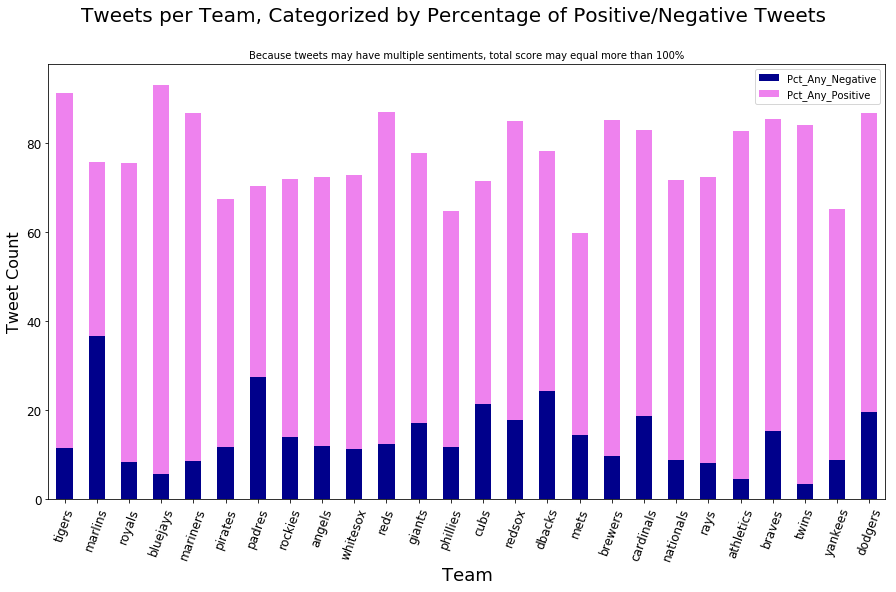

In [11]:

colors = ["darkblue","violet"]
#chart_df3.set_index('teams')
chart_df3.set_index('teams').plot.bar(stacked=True,rot=0,  figsize=(15,8), fontsize=12, color=colors)
plt.xticks(rotation=70)
plt.suptitle('Tweets per Team, Categorized by Percentage of Positive/Negative Tweets', fontsize=20)
plt.title('Because tweets may have multiple sentiments, total score may equal more than 100%', fontsize=10)

plt.xlabel('Team', fontsize=18)
plt.ylabel('Tweet Count', fontsize=16)